##Goal Of Prediction Passenger Survive
Bertujuan untuk menerapkan teknik-teknik Machine Learning untuk memprediksi kelangsungan hidup penumpang di kapal Titanic

##Problem and Data Understanding
Dalam data ini, kita akan menggunakan data yang tersedia tentang penumpang, seperti usia, jenis kelamin, kelas tiket, dan lain-lain, untuk memprediksi apakah seseorang selamat atau tidak selamat dalam kecelakaan kapal Titanic.

##Attribute Information:
**Variable**

- survival: 0 = No, 1 = Yes
- pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sex : Sex
- Age : in years
- sibsp : of siblings / spouses aboard the Titanic
- parch : of parents / children aboard the Titanic
- ticket : Ticket number
- fare : Passenger fare
- cabin : Cabin number
- embarked : Port of Embarkation C = Cherbourg, Q = - - Queenstown, S = Southampton

**Variable Notes**

pclass: A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

##Import Datasets

In [ ]:
#import package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission (2).csv
Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [ ]:
import pandas as pd
import io

# Mengecek kunci yang ada dalam objek uploaded
print(uploaded.keys())

# Membaca file CSV
gender_submission = pd.read_csv(io.BytesIO(uploaded['gender_submission (2).csv']))
test = pd.read_csv(io.BytesIO(uploaded['test (2).csv']))
train = pd.read_csv(io.BytesIO(uploaded['train (2).csv']))

dict_keys(['gender_submission (2).csv', 'test (2).csv', 'train (2).csv'])


In [ ]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#Data Prepocessing

##Check Missing Value

In [ ]:
print('Null values in train dataset:'
      , train.isnull().sum())
print('Null values in test dataset:',
      test.isnull().sum())

Null values in train dataset: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Null values in test dataset: PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Drop the unnecessary column in datasets

In [ ]:
train = train.drop(['PassengerId', 'Cabin' , 'Name','Ticket'], axis = 1)
test = test.drop([ 'Cabin' , 'Name','Ticket'], axis = 1)

In [ ]:
train = pd.get_dummies(train, dtype=float)
test = pd.get_dummies(test, dtype=float)

print(train.columns.values)
print(test.columns.values)

['Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Sex_female' 'Sex_male'
 'Embarked_C' 'Embarked_Q' 'Embarked_S']
['PassengerId' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Sex_female'
 'Sex_male' 'Embarked_C' 'Embarked_Q' 'Embarked_S']


Overall, tujuannya adalah untuk mempertahankan fitur-fitur yang memberikan hasil dan menghapus fitur-fitur yang tidak penting atau jarang digunakan untuk memprediksi variabel target. Langkah ini membersihkan data untuk dimasukkan ke dalam model.

- Kolom PassengerId, Cabin, Name, dan Ticket dihilangkan dari data pelatihan dan pengujian karena tidak memberikan informasi yang berguna untuk memprediksi kelangsungan hidup.
- PassengerId - Ini hanya nomor ID dan tidak ada hubungannya dengan hasil kelangsungan hidup.
- Kabin - Banyak nilai kabin yang hilang, jadi fitur ini tidak akan terlalu berguna. Lokasi kabin mungkin berkorelasi dengan kelas, namun kelas sudah tercakup.
- Nama - Nama penumpang tidak berhubungan langsung dengan peluang bertahan hidup, jadi fitur ini tidak diperlukan.
- Tiket - Nomor tiket kemungkinan besar tidak dapat memprediksi kelangsungan hidup, dan sebagian besar data ini jarang (banyak nomor tiket unik dengan sedikit penumpang untuk masing-masing nomor).

In [ ]:
# Split train dataset untuk training data and testing data dengan Ridge modeling
train_data = train[[ 'Pclass', "Fare",'Age', 'Sex_female', 'Sex_male', 'Embarked_C','Embarked_Q','Embarked_S']]
train_data_t = train_data[train_data["Age"].isna()]
train_data.dropna(inplace = True)

tr_y_train = train_data["Age"]

tr_X_train = train_data.drop("Age", axis=1)
tr_X_test = train_data_t.drop("Age", axis=1)

<ipython-input-83-2328ef544b9b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.dropna(inplace = True)


Seleksi Fitur:

Variabel train_data merupakan subset dari dataset pelatihan (train) yang hanya berisi kolom-kolom yang dipilih untuk digunakan dalam pemodelan. Kolom-kolom tersebut melibatkan informasi seperti kelas tiket (Pclass), tarif (Fare), usia (Age), jenis kelamin (Sex_female dan Sex_male), serta pelabuhan keberangkatan (Embarked_C, Embarked_Q, dan Embarked_S).
Pemrosesan Data:

Variabel train_data_t dibuat sebagai subset dari train_data yang hanya berisi baris-baris di mana nilai kolom "Age" bernilai NaN (missing values). Ini digunakan untuk menyimpan data yang akan diprediksi usianya nanti.

Kemudian, baris dengan nilai NaN untuk kolom "Age" dihapus dari train_data menggunakan metode dropna(). Variabel ini akan digunakan sebagai data pelatihan sebenarnya.

Pembagian Data dan Target:

tr_y_train dibuat untuk menyimpan variabel target, yaitu kolom "Age" dari train_data.

tr_X_train dibuat untuk menyimpan variabel-variabel independen (fitur) yang akan digunakan dalam pelatihan model. Kolom "Age" dihapus dari train_data untuk mendapatkan fitur-fitur ini.

tr_X_test dibuat untuk menyimpan fitur-fitur dari train_data_t, yang akan digunakan untuk menguji model dan memprediksi usia pada data yang awalnya memiliki nilai NaN untuk kolom "Age".

Drop NaN Values:

Baris yang memiliki nilai NaN dihapus dari train_data untuk memastikan tidak ada nilai yang hilang dalam data pelatihan.
Dengan langkah-langkah ini, data telah dipersiapkan untuk melibatkan fitur-fitur yang diinginkan dan memisahkan data pelatihan menjadi variabel target (tr_y_train) dan variabel independen (tr_X_train). Data yang memiliki nilai NaN untuk kolom "Age" juga telah dipisahkan untuk nantinya digunakan sebagai data uji (tr_X_test). Data ini kemudian dapat digunakan untuk melatih model regresi Ridge untuk memprediksi usia berdasarkan fitur-fitur yang diberikan.

In [ ]:
test_data = test[[ 'Pclass', 'Fare','Age', 'Sex_female','Sex_male', 'Embarked_C','Embarked_Q','Embarked_S']]
test_data_t = test_data[test_data["Age"].isna()]
test_data.dropna(inplace = True)

t_y_train = test_data["Age"]

t_X_train = test_data.drop("Age", axis=1)
t_X_test = test_data_t.drop("Age", axis=1)

<ipython-input-85-fba88bc2501a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.dropna(inplace = True)


Untuk memprediksi nilai Age yang hilang pada train dataset dan pengujian menggunakan model regresi Ridge. Dengan tujuan adalah untuk memprediksi nilai Age yang hilang pada dataset pelatihan dan pengujian menggunakan model regresi Ridge. Gunakan metode Regresi Ridge untuk memprediksi observasi dan pengisian Age data yang hilang dengan model prediksi

In [ ]:
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns',None) # This sets pandas to show all dataframe columns instead of truncating

from sklearn.linear_model import Ridge # Ridge regression model for prediction tasks
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # Ensemble methods RandomForest and XGBoost for classification


from sklearn.model_selection import GridSearchCV,train_test_split, PredefinedSplit # Tools for splitting data, tuning hyperparameters
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report # Metrics for evaluating model performance
from sklearn.metrics import roc_auc_score,roc_curve # ROC and AUC metrics for classification models

In [ ]:
model = Ridge(alpha = 1, positive =True)

In [ ]:
model.fit(tr_X_train,tr_y_train)

Ridge(alpha=1, positive=True)

- Variabel target (Usia) dan fitur diekstraksi dari data lengkap. Fitur-fitur tersebut digunakan agar sesuai dengan model Ridge untuk memprediksi Usia.
- Proses yang sama diulangi untuk data pengujian, membuat test_data_t yang berisi sampel dengan Usia yang hilang.

In [ ]:
# Menentukan nilai prediksi training dataset and testing dataset
tr_y_pred = model.predict(tr_X_test)
t_y_pred = model.predict(t_X_test)

In [ ]:
# Membuat kumpulan data dengan nilai prediksi dari model
tr_pred = pd.DataFrame(tr_y_pred,columns = ['prevision'])
t_pred = pd.DataFrame(t_y_pred, columns = ['prevision'])

In [ ]:
# Cocokkan indeks dari data prediksi dengan kumpulan data "Usia" yang ditargetkan
tr_na = train[train['Age'].isna()]
tr_nan = tr_na.reset_index().copy()
tr_df_prev = pd.concat([tr_nan, tr_pred], axis = 1)
tr_df_prev = tr_df_prev.set_index('index')
tr_df_prev


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,prevision
index,,,,,,,,,,,,
5,0,3,NaN,0,0,8.4583,0.0,1.0,0.0,1.0,0.0,30.076021
17,1,2,NaN,0,0,13.0000,0.0,1.0,0.0,0.0,1.0,30.218723
19,1,3,NaN,0,0,7.2250,1.0,0.0,1.0,0.0,0.0,26.932225
26,0,3,NaN,0,0,7.2250,0.0,1.0,1.0,0.0,0.0,30.398168
28,1,3,NaN,0,0,7.8792,1.0,0.0,0.0,1.0,0.0,26.591883
...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,NaN,0,0,7.2292,0.0,1.0,1.0,0.0,0.0,30.398300
863,0,3,NaN,8,2,69.5500,1.0,0.0,0.0,0.0,1.0,28.529597
868,0,3,NaN,0,0,9.5000,0.0,1.0,0.0,0.0,1.0,30.108752


In [ ]:
t_na = test[test['Age'].isna()]
t_nan = t_na.reset_index().copy()
t_df_prev = pd.concat([t_nan, t_pred], axis = 1)
t_df_prev = t_df_prev.set_index('index')
t_df_prev

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,prevision
index,,,,,,,,,,,,
10,902,3,NaN,0,0,7.8958,0.0,1.0,0.0,0.0,1.0,30.058347
22,914,1,NaN,0,0,31.6833,1.0,0.0,0.0,0.0,1.0,27.339815
29,921,3,NaN,2,0,21.6792,0.0,1.0,1.0,0.0,0.0,30.852323
33,925,3,NaN,1,2,23.4500,1.0,0.0,0.0,0.0,1.0,27.081122
36,928,3,NaN,0,0,8.0500,1.0,0.0,0.0,0.0,1.0,26.597250
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,NaN,0,0,7.7208,1.0,0.0,0.0,1.0,0.0,26.586906
410,1302,3,NaN,0,0,7.7500,1.0,0.0,0.0,1.0,0.0,26.587824
413,1305,3,NaN,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,30.063192


In [ ]:
# Isi data yang hilang dengan nilai prediksi dari model
train = train.fillna({'Age':tr_df_prev['prevision']}).copy()
test = test.fillna({'Age':t_df_prev['prevision']}).copy()

In [ ]:
train = pd.get_dummies(train, dtype=float)
test = pd.get_dummies(test, dtype=float)

Nilai Age yang hilang diisi dengan prediksi yang Sesuai dari model sebelum melakukan analisis atau pemodelan lebih lanjut. Proses yang sama dapat diterapkan untuk memperhitungkan variabel kontinu yang hilang. Hal ini memungkinkan nilai Age yang hilang diisi dengan prediksi yang sesuai dari model sebelum melakukan analisis atau pemodelan lebih lanjut. Proses yang sama dapat diterapkan untuk memperhitungkan variabel kontinu yang hilang.

In [ ]:
print('Null value in Train dataset',train.isna().sum())
print('Null value in Test dataset',test.isna().sum())

Null value in Train dataset Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64
Null value in Test dataset PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64


<Axes: title={'center': 'Correlation Heatmap'}>

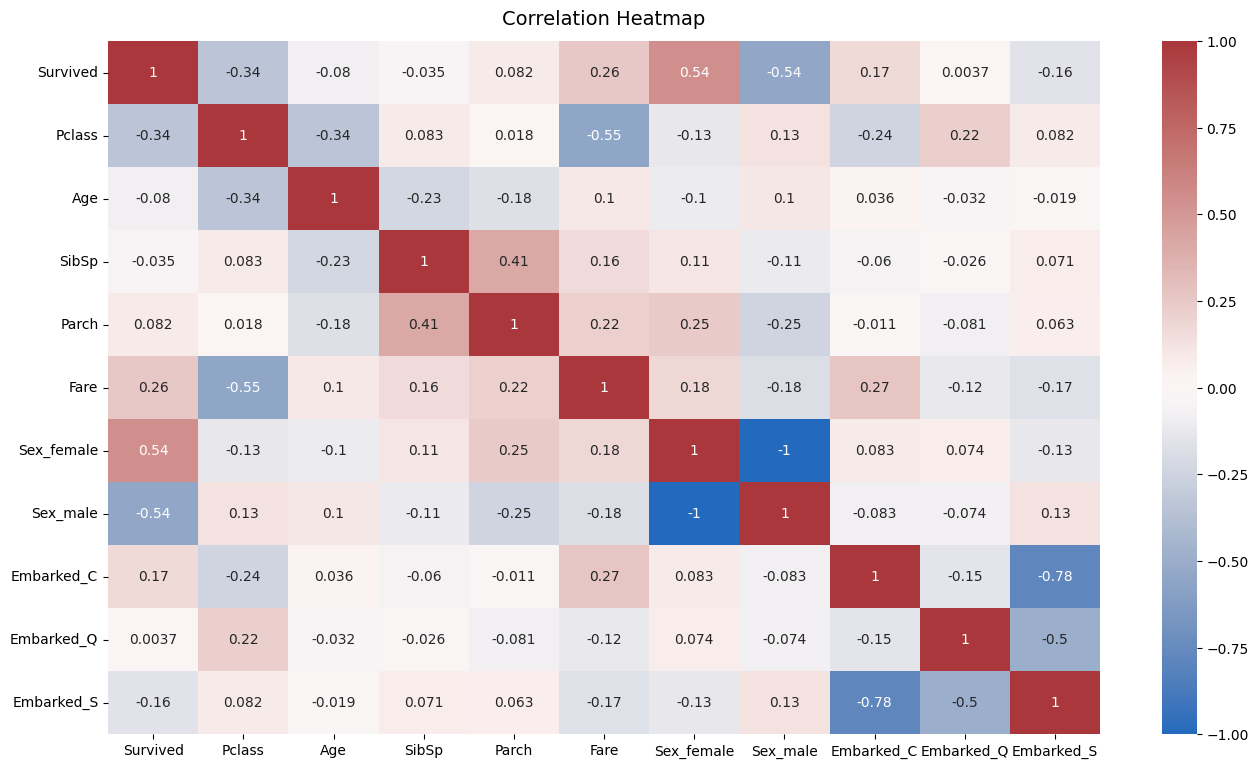

In [ ]:
plt.figure(figsize = (16,9))
heatmap = sns.heatmap(train.corr(), vmin = -1, vmax = 1, annot = True, cmap = sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
heatmap

Analisis Korelasi Data

Nilai target yang perlu diprediksi adalah Survived. Berdasarkan HeatMap korelasi, saya memutuskan untuk memilih kolom Tarif dan Usia untuk rekayasa fitur karena skala korelasinya yang baik karena:
- Fare (Tarif):
Fitur ini dipilih karena memiliki korelasi yang baik dengan variabel target. Mungkin ada indikasi bahwa penumpang dengan tarif yang lebih tinggi memiliki peluang selamat yang lebih besar.
- Age (Usia):
Fitur ini juga dipilih karena korelasi yang baik dengan variabel target. Usia dapat mempengaruhi peluang selamat, seperti mungkin adanya prioritas evakuasi untuk anak-anak atau orang tua.

Untuk Sex dan Pclass juga skalanya sudah bagus namun sudah terklasifikasi sehingga tidak diperlukan rekayasa fitur. Target nilai yang perlu diprediksi adalah Survived.

#Data Encoding and Feature Engineering

##Clasification Fare

In [ ]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
train['Fare'] = train['Fare'].astype('category')
test['Fare'] = test['Fare'].astype('category')


Statistik ini menunjukkan korelasi yang kuat antara tarif yang lebih tinggi dan tingkat kelangsungan hidup yang lebih tinggi di kapal Titanic. Penumpang terkaya pada kelompok tarif tertinggi mempunyai kelangsungan hidup yang jauh lebih baik dibandingkan dengan penumpang pada kelompok tarif terendah.

- Kelompok tarif terendah (-0,001, 7,91] memiliki tingkat kelangsungan hidup terendah yaitu 19,7%
- Kelompok tarif tertinggi (31.0, 512.329] memiliki tingkat kelangsungan hidup tertinggi yaitu 58,1%
- Terdapat tren peningkatan yang jelas mengenai tingkat kelangsungan hidup yang lebih tinggi pada kelompok tarif yang lebih tinggi
- Tingkat kelangsungan hidup meningkat lebih dari dua kali lipat dari kelompok tarif terendah hingga tertinggi (19,7% menjadi 58,1%)

In [ ]:
#Encoding label pada Fare berdasarkan FareBand yang telah ditentukan
# Convert 'Fare' column to numeric for comparison
train['Fare'] = train['Fare'].astype(float)
test['Fare'] = test['Fare'].astype(float)

# Now, you can safely perform comparisons
train.loc[train['Fare'] <= 7.91, 'Fare'] = 0
test.loc[test['Fare'] <= 7.91, 'Fare'] = 0

train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1

train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare'] = 2
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare'] = 2

train.loc[train['Fare'] > 31, 'Fare'] = 3
test.loc[test['Fare'] > 31, 'Fare'] = 3

# Convert 'Fare' column back to categorical using pd.Categorical
fare_categories = [0, 1, 2, 3]
train['Fare'] = pd.Categorical(train['Fare'], categories=fare_categories)
test['Fare'] = pd.Categorical(test['Fare'], categories=fare_categories)

# Handle missing values
train['Fare'].fillna(0, inplace=True)
test['Fare'].fillna(0, inplace=True)


In [ ]:
train['AgeBand'] = pd.qcut(train['Age'], 4)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.419, 22.0]",0.424242
1,"(22.0, 30.0]",0.427966
2,"(30.0, 35.0]",0.292683
3,"(35.0, 80.0]",0.378995


Statistik kelangsungan hidup Titanic berdasarkan usia menunjukkan penumpang berusia 20-an memiliki hasil terbaik, sedangkan mereka yang berusia awal 30-an mendapatkan hasil terburuk. Kelompok yang sangat muda dan sangat tua memiliki tingkat kelangsungan hidup yang lumayan. Hal ini memberikan gambaran menarik tentang kemungkinan bertahan hidup berdasarkan usia di Titanic.

- Tingkat kelangsungan hidup tertinggi pada kelompok usia (22,0, 30,0] sebesar 42,8%
- Kelangsungan hidup terendah adalah untuk kelompok (30,0, 35,0] sebesar 29,3%
- Kelompok termuda (0,419, 22,0] dan tertua (35,0, 80,0] memiliki tingkat kelangsungan hidup yang sama yaitu 42,4% dan 37,9%

Perbedaan antara tingkat kelangsungan hidup terendah dan tertinggi adalah 13,5 poin persentase.

In [ ]:
## Encoding label opada Age berdasarkan determined AgeBand
# Convert 'Age' column to numeric for comparison
train['Age'] = train['Age'].astype(float)
test['Age'] = test['Age'].astype(float)

# Now, you can safely perform comparisons
train.loc[train['Age'] <= 22, 'Age'] = 0
test.loc[test['Age'] <= 22, 'Age'] = 0

train.loc[(train['Age'] > 22) & (train['Age'] <= 30), 'Age'] = 1
test.loc[(test['Age'] > 22) & (test['Age'] <= 30), 'Age'] = 1

train.loc[train['Age'] > 30, 'Age'] = 2
test.loc[test['Age'] > 30, 'Age'] = 2

# Handle missing values (if any)
train['Age'].fillna(0, inplace=True)
test['Age'].fillna(0, inplace=True)

# Convert 'Age' column back to categorical (if needed)
# If you want 'Age' to be categorical, convert it back after the comparisons are done
# train['Age'] = train['Age'].astype('category')
# test['Age'] = test['Age'].astype('category')

##SibSp attribute explanatory


In [ ]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='SibSp', ascending=True)
# Generate statistical table that explains relation between "SibSp" and target "Survived"

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Statistik ini menunjukkan bahwa memiliki sejumlah kecil anggota keluarga di kapal akan bermanfaat bagi kelangsungan hidup, kemungkinan besar dengan memberikan dukungan. Namun ketika jumlahnya meningkat, hasil kelangsungan hidup menurun tajam.

- Tingkat kelangsungan hidup tertinggi adalah bagi mereka yang memiliki 1 saudara kandung/pasangan, yaitu 53,6%.
- Angka tersebut menurun seiring dengan bertambahnya angka dari 0 menjadi 4.
- Tidak ada seorang pun dengan 5 atau 6 saudara kandung/pasangan di dalamnya yang selamat.
- Tidak memiliki saudara kandung/pasangan di kapal memiliki tingkat kelangsungan hidup 34,5%.

Terdapat tren penurunan kelangsungan hidup yang jelas seiring dengan meningkatnya jumlah saudara kandung/pasangan yang mendampingi.

##"Parch" attribute explanatory

In [ ]:
#Buat tabel statistik yang menjelaskan hubungan antara atribut "Parch" dan target "Survived"
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Parch', ascending=True)

In [ ]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Parch', ascending=True)
# Generate statistical table that explains relation between attribute "Parch" and target "Survived"

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


Terdapat 1-3 orang tua/anak-anak yang berada di kapal tersebut bermanfaat untuk kelangsungan hidup, kemungkinan besar karena dukungan keluarga. Namun seiring bertambahnya jumlah korban, hasil akhirnya menurun tajam, hingga tidak ada seorang pun yang selamat dengan 6 anggota keluarga di dalamnya. Secara keseluruhan, jumlah keluarga pendamping yang lebih sedikit membantu kelangsungan hidup.

- Tingkat kelangsungan hidup tertinggi bagi mereka yang memiliki 3 orang tua/anak di dalamnya yaitu 60%
- Memiliki 1 orang tua/anak memiliki tingkat kelangsungan hidup 55%.
- Tingkat kelangsungan hidup menurun seiring dengan peningkatan angka dari 0 menjadi 4
- Tidak ada seorang pun dengan 4 orang tua/anak yang selamat
- 20% kelangsungan hidup bagi mereka yang memiliki 5 orang di dalamnya
- 0% kelangsungan hidup untuk 6 orang tua/anak di dalamnya

##"Family_size" and "IsAlone" Features engineering

In [ ]:
train['Family_size'] = train['SibSp'] + train['Parch']
test['Family_size'] = test['SibSp'] + test['Parch']

train['IsAlone'] = np.where(train['Family_size'] == 0 ,  1 , 0)
test['IsAlone'] = np.where(test['Family_size'] == 0, 1, 0)

# Create the new Feature call "IsAlone" attribute that combine the value of SibSp and Parch values

Karena adanya korelasi antara "SibSp" dan "Parch" dengan target "Survived", maka perlu dibuat pengklasifikasi baru "IsAlone" yang menunjukkan apakah penumpang Titanic sendirian atau tidak. Statistik ini menunjukkan bahwa penumpang yang bepergian tanpa anggota keluarga memiliki tingkat kelangsungan hidup yang jauh lebih tinggi dibandingkan penumpang yang bepergian dengan keluarga. Hal ini menunjukkan bahwa memiliki keluarga di kapal menghambat peluang seseorang untuk selamat dari tenggelamnya kapal, mungkin karena mereka berusaha untuk tetap bersama daripada segera naik ke sekoci.

In [ ]:
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='IsAlone', ascending=True)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


- Penumpang yang bepergian sendirian memiliki tingkat kelangsungan hidup sebesar 50,6%.
- Penumpang dengan keluarga di dalamnya memiliki tingkat kelangsungan hidup sebesar 30,4%.

Kesendirian meningkatkan peluang bertahan hidup sebesar 20,2 poin persentase
Secara keseluruhan, berbagai analisis tingkat kelangsungan hidup berdasarkan karakteristik penumpang memberikan wawasan menarik mengenai faktor-faktor yang berkorelasi dengan lebih tinggi atau lebih rendahnya peluang untuk selamat dari tenggelamnya Titanic.

In [ ]:
train = train.drop(['SibSp', 'Parch', 'Family_size', 'FareBand','AgeBand'], axis = 1)
test = test.drop(['SibSp', 'Parch', 'Family_size'], axis = 1)

In [ ]:
train['Fare'] = train['Fare'].astype(object)
test['Fare'] = train['Fare'].astype(object)


# Convert data type of 'Fare' attribute into object for Encoding
train = pd.get_dummies(train, dtype=float)
test = pd.get_dummies(test, dtype=float)
train

# Final encoding data

<ipython-input-107-6c98f65e1d18>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  train = pd.get_dummies(train, dtype=float)
<ipython-input-107-6c98f65e1d18>:7: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  test = pd.get_dummies(test, dtype=float)


,Survived,Pclass,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,IsAlone,Fare_0,Fare_1,Fare_2,Fare_3
0,0,3,0.0,0.0,1.0,0.0,0.0,1.0,0,1.0,0.0,0.0,0.0
1,1,1,2.0,1.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0
2,1,3,1.0,1.0,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0
3,1,1,2.0,1.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,1.0
4,0,3,2.0,0.0,1.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,0.0,1.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0
887,1,1,0.0,1.0,0.0,0.0,0.0,1.0,1,0.0,0.0,1.0,0.0
888,0,3,1.0,1.0,0.0,0.0,0.0,1.0,0,0.0,0.0,1.0,0.0
889,1,1,1.0,0.0,1.0,1.0,0.0,0.0,1,0.0,0.0,1.0,0.0


In [ ]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   Sex_female  891 non-null    float64
 4   Sex_male    891 non-null    float64
 5   Embarked_C  891 non-null    float64
 6   Embarked_Q  891 non-null    float64
 7   Embarked_S  891 non-null    float64
 8   IsAlone     891 non-null    int64  
 9   Fare_0      891 non-null    float64
 10  Fare_1      891 non-null    float64
 11  Fare_2      891 non-null    float64
 12  Fare_3      891 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 90.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    

#Modelling

Model yang berbeda diujia Random Forest dan XGBoost. Untuk masing-masing parameter, GridSearchCV melakukan tuning hyperparameter dengan menguji kombinasi parameter yang berbeda pada set validasi.

##Separate into data train, data test and validation data

In [ ]:
y_train = train['Survived']

X_train = train.drop(['Survived'], axis = 1)

X_val, X_t, y_val, y_t = train_test_split(X_train,y_train, test_size= 0.25)

X_test = test.drop(['PassengerId'], axis = 1)

training data digunakan untuk menyesuaikan model, validasi untuk tuning hyperparameter, dan set pengujian diadakan untuk evaluasi akhir. Tentukan hyperparameter untuk menyetel model dengan menggunakan GridSearchCV

##Random Forest model parameters

In [ ]:
cv_params = {'n_estimators': [ 200, 400],
             'max_depth': [2,None],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,4],
             'max_samples': [0.5, 0.9]
}

##Gradient Boosting model parameters

In [ ]:
gb_params = {
            'n_estimators': [200, 400, 600],
            'max_depth': [2,4,None],
            'learning_rate': [0.01, 0.05]
          }

##Random Forest Modelling

In [ ]:
rf = RandomForestClassifier()

# Determine model

In [ ]:
rf_val = GridSearchCV(rf, cv_params, cv = 5, refit= 'f1', n_jobs=-1, verbose= 1)

# Applying hyperparameters to model

In [ ]:
%%time

rf_val.fit(X_val, y_val)

# Fitting model

Fitting 5 folds for each of 32 candidates, totalling 160 fits
CPU times: user 1.71 s, sys: 228 ms, total: 1.94 s
Wall time: 1min 27s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, None], 'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [200, 400]},
             refit='f1', verbose=1)

In [ ]:
print('Random Forest best parameters:', rf_val.best_params_)
print('Random Forest best score:', rf_val.best_score_)

Random Forest best parameters: {'max_depth': None, 'max_samples': 0.9, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest best score: 0.7919200987543485


##Gradient Boosting Modelling

In [ ]:
gb = GradientBoostingClassifier()

# Determone Gradient boosting model

In [ ]:
gb_val = GridSearchCV(gb, gb_params, cv = 5, verbose= 1)

# Apply hyperparamenters to model

In [ ]:
%%time

gb_val.fit(X_val,y_val)

# Fitting model

Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: user 1min 27s, sys: 283 ms, total: 1min 27s
Wall time: 1min 45s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05],
                         'max_depth': [2, 4, None],
                         'n_estimators': [200, 400, 600]},
             verbose=1)

In [ ]:
print('GradientBoosting best parameters:', gb_val.best_params_)
print('GradientBoosting Forest best score:', gb_val.best_score_)

GradientBoosting best parameters: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 600}
GradientBoosting Forest best score: 0.8128829536527886


##modelling Evaluation

In [ ]:
def get_scores(model_name:str, model, X_test_data, y_test_data):


    preds = model.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })

    return table

##Performance of Evaluative Models

In [ ]:
rf_scores_table = get_scores('Random forest model', rf_val, X_t, y_t)
gb_scores_table = get_scores('Gradient Boosting model', gb_val, X_t,y_t)
print(rf_scores_table)
print(gb_scores_table)

                 model  precision    recall        f1  accuracy       AUC
0  Random forest model   0.820896  0.639535  0.718954  0.807175  0.775972
                     model  precision    recall        f1  accuracy       AUC
0  Gradient Boosting model    0.84127  0.616279  0.711409  0.807175  0.771643


Berdasarkan metrik evaluasi yang ditunjukkan dalam tabel, model XGBoost mencapai presisi, perolehan, skor F1, dan akurasi yang sebanding dengan model Random Forest. Namun, model XGBoost sedikit mengungguli Random Forest di semua metrik. Oleh karena itu, karena kinerjanya yang lebih kuat, model XGBoost dipilih sebagai model terbaik untuk memprediksi variabel target. Berdasarkan hasil yang ditunjukkan pada tabel di atas, skor F1, presisi, recall, dan akurasi model XGBoost serupa dengan skor yang sesuai dari Random Forest. Model XGBoost tampaknya mengungguli model Random Forest. Oleh karena itu, model XGBoost dipilih sebagai model ideal untuk prediksi target.

In [ ]:
%%time

gb_opt = gb_val.fit(X_train,y_train)

# Fitting final model after the model evaluation

Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: user 1min 30s, sys: 255 ms, total: 1min 30s
Wall time: 1min 37s


In [ ]:
y_pred = gb_opt.predict(X_test)

# Generate predicted data

In [ ]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'],
                           'Survived': y_pred})
submission.to_csv("submission.csv", index = False)

# Create submission datasset

#Conclussion

Overall, Model akhir dievaluasi pada set pengujian untuk mendapatkan perkiraan yang tidak bias tentang seberapa baik model tersebut dapat digeneralisasikan ke data baru.

Di sini, **model XGBoost** memiliki performa terbaik, dengan akurasi, AUC, presisi, recall, dan skor F1 yang baik.